In [ ]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
#import algorithms specifically from scikit- learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
#import dataset
df = pd.read_csv("california_housing.csv")

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#remove tenth column
objects = df.select_dtypes(include=['object']).columns #selects all columns with non-numeric data
df = df.drop(columns = objects, axis = 1) #gets rid of all columns with non-numeric data
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
#find missing values and fill them with average of columns
df.isnull().sum().sum()
df = df.dropna()

In [ ]:
#get rid of headers
j = 0
for i in df.columns:
  df = df.rename(columns={i: j})
  j+=1

df

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
#seperate the labels and features y = labels, x = features
x = df.iloc[:,:8]
y = df[8]
x

,0,1,2,3,4,5,6,7
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
#split features and labels into traning and testing data (80% of data for training, 20% for testing)
from sklearn.model_selection import train_test_split
#split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#create model and fit training data through model
model = LinearRegression()
model.fit(x_train,y_train)
y_model = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

Mean Squared Error: 4921881237.628146
R^2 Score: 0.6400865688993737


array([197058.03752153, 157508.79088918, 202099.26270387, ...,
       131098.67538845, 155468.78077784, 166363.59962368])

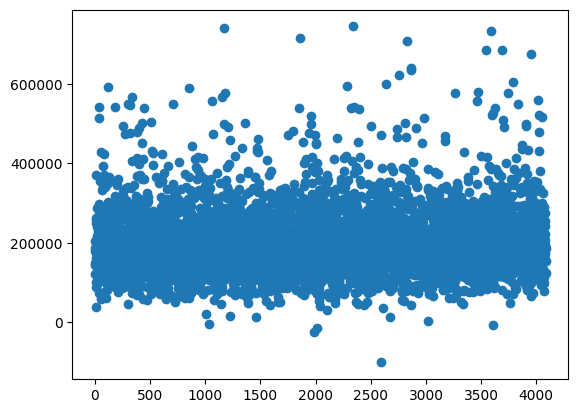

In [ ]:
#visual respresentation
y_test_rep = np.array(y_test)
plt.plot(y_model, "o")
plt.show()

In [ ]:
#test accuracy of results


In [ ]:
#visual representation of model

coefficients = model.coef_
intercept = model.intercept_
equation = "y = " + " + ".join([f"{coeff:.2f} * x{i}" for i, coeff in enumerate(coefficients)])
equation += f" + {intercept:.2f}"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y = -9835.26 * x0 + 23624.15 * x1 + -37515.84 * x2 + 38709.47 * x3 + -41509.69 * x4 + 46860.00 * x5 + 88636.25 * x6 + 206788.56


In [ ]:
#svm regression model with no hypertuning
model = SVR()
model.fit(x_train,y_train)
#run test values through model
y_model = model.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

In [ ]:
#svm regression model with hypertuning
model = SVR(C=100, gamma=1, kernel='linear')
model.fit(x_train,y_train)
#run test values through model
y_model = model.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

Mean Squared Error: 5460721880.601433
R^2 Score: 0.6006837521173822


[[ 1.16329175 -1.33091204 -0.68562884 ... -0.64200881 -0.36191312
  -0.68271329]
 [-0.85814157  1.11257027 -2.11516497 ...  1.19690991  0.32430701
   1.46474371]
 [ 0.71408434 -0.80195897  0.18797657 ...  0.7888426  -0.34090477
  -0.68271329]
 ...
 [ 0.26986813 -0.14661889 -1.32097823 ...  0.06164572 -0.69167578
   1.46474371]
 [ 1.07345027 -0.72706297 -0.05027945 ... -0.14500375 -0.20363968
   1.46474371]
 [ 1.23316846 -1.43389406 -1.16214088 ...  1.81424251 -0.8139349
  -0.68271329]]


In [ ]:
#knn regression model with no hypertuning
model = KNeighborsRegressor(n_neighbors=7)
model.fit(x_train,y_train)
#run test values through model
x_test = x_test.astype("float16")
y_model = model.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

Mean Squared Error: 3869054916.963573
R^2 Score: 0.7170746787559291


In [ ]:
#Random Forest Regressor model with no hypertuning
model = RandomForestRegressor()
model.fit(x_train,y_train)
#run test values through model
y_model = model.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

Mean Squared Error: 4039595858.0918455
R^2 Score: 0.6917301449266151


In [ ]:
#Gradient Boost model with no hypertuning
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
#run test values through model
y_model = model.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_model))
print('R^2 Score:', r2_score(y_test, y_model))

Mean Squared Error: 3087939315.3077297
R^2 Score: 0.7741938944998796
